**Необходимо построить минимум 5 визуализации различных видов по выбранным данным, используя хотя бы две из рассмотренных на занятии библиотек**.

Для каждой визуализации описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и *какие гипотезы на ее основе можно выдвинуть*.

**Откуда брать данные?**

Можно взять свой датасет (тогда не забудьте его выложить на github вместе с ноутбуком) или воспользоваться любым понравившемся из открытых источников (например, [kaggle.com](https://www.kaggle.com/)). Если идей нет, можете взять один из перечисленных ниже:

* [Данные IMDB](https://www.kaggle.com/tmdb/tmdb-movie-metadata);
* [Данные NYC](https://www.kaggle.com/c/nyc-taxi-trip-duration);
* [Данные NBA](https://www.kaggle.com/drgilermo/nba-players-stats).

In [38]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv("tmdb_5000_movies.csv")

Рассмотрим многообразие языков, на которых сняты фильмы в изучаемом датасете. Известно, что на IMDb преобладают англоязычные фильмы (что, впрочем, видно еще из описания датасета).

<BarContainer object of 37 artists>

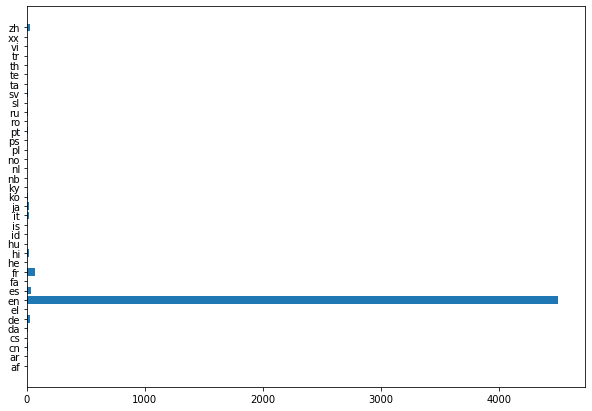

In [40]:
langs = movies[['original_language', 'id']]
langs_set = langs.groupby('original_language').count().reset_index()
plt.barh(langs_set['original_language'], langs_set['id'])

Значимыми в датасете являются языки: английский, французский, немецкий, хинди, китайский, японский, итальянский, испанский. На них и проверим следующую гипотезу.

Оценим средние рейтинги фильмов в зависимости от языка, на котором они сняты

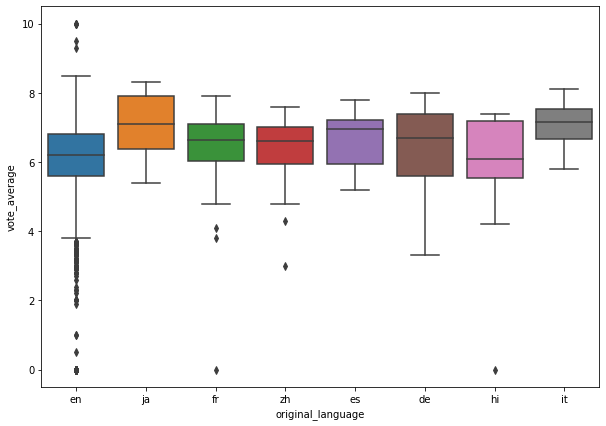

In [44]:
lang_ratings = movies[movies['original_language'].isin(['zh', 'ja', 'it', 'hi', 'fr', 'es', 'en', 'de'])]
ax = sns.boxplot(x="original_language", y="vote_average", 
            data=lang_ratings)

Видно, что большое количество рейтингов в фильмах на английском закономерно попали в выбросы (много данных → много выбросов). При этом, что интересно, у фильмов на английском одни из самых низких средних рейтингов. На следующем графике увидим разброс оценок критиков.

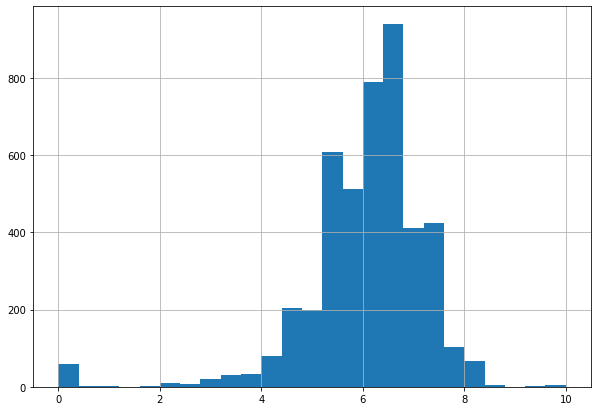

In [51]:
en_ratings = lang_ratings[lang_ratings['original_language'] == 'en']
en_ratings['vote_average'].hist(bins=25)

Видно, что большинство оценок фильмам на английском языке находится в промежутке от 5 до 7,5. 

Следующая гипотеза — раньше было лучше. Оценим, насколько меняется с годами средний рейтинг фильмов за год.

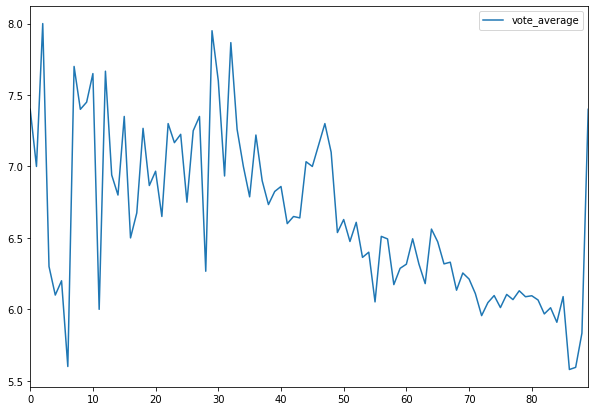

In [99]:
movies['release_date'] = movies.release_date.astype('str')
def get_year(row):
    cur_year = row['release_date'].split('-')
    cur_year = cur_year[0]
    if cur_year == 'nan':
        cur_year = '0'
    return cur_year
movies['release_year'] = movies.apply(get_year, axis = 1)
average_ratings = movies[(movies['release_year'] != '0')].groupby('release_year').mean().reset_index()
average_ratings[['release_year', 'vote_average']].plot()

Однозначно видно тренд на понижение с каждым последующим годом, кроме последнего. Видимо, действительно раньше было лучше.

Проверим наличие корреляций по четырем гипотезам в два блока. В первом мы проверим, есть ли взаимосвязь между оценкой фильма и его длиной (гипотеза — очень долгие фильмы получают оценки ниже) и взаимосвязь между оценкой и бюджетом фильма (гипотеза — в среднем блокбастеры должны оцениваться все равно выше)

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


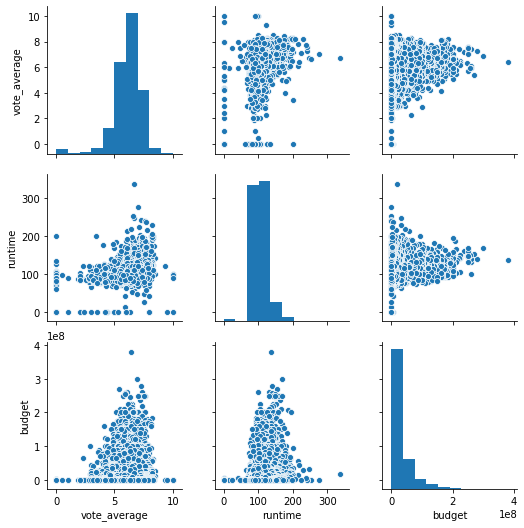

In [100]:
sns_plot = sns.pairplot(
    movies[['vote_average', 'runtime', 'budget']])
sns_plot

Очень слабая корреляция наблюдается в зависимости между средним рейтингом и длительностью фильма: фильмов с длительностью около 100 минут много, поэтому они получают разные оценки, но видно, что чем длиннее фильм, тем выше вероятность получения высокого рейтинга.
Корреляций между средним рейтингом и бюджетом, как и длительностью и бюджетом не обнаружено.

Второй набор гипотез — проверить, есть ли корреляция между бюджетом и сборами фильма (логично предположить, что при больших тратах закладывается большой маркетинг, а значит и большой доход), а также найти взаимосвязь сборов и оценки фильма

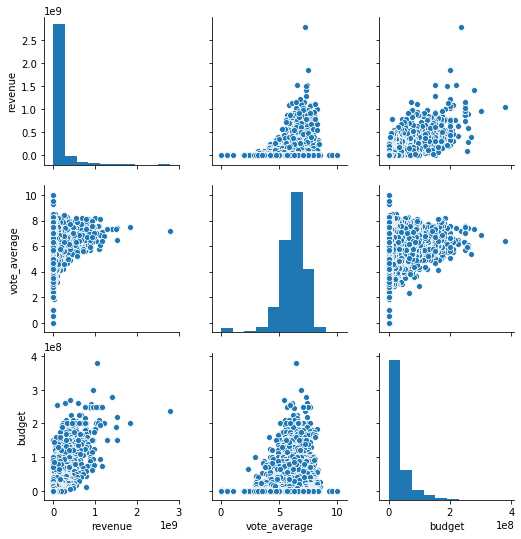

In [101]:
sns_plot = sns.pairplot(
    movies[['revenue', 'vote_average', 'budget']])
sns_plot

Видна корреляция между сборами и бюджетом фильма, хоть и наибольшие сборы у фильма с не самым большим бюджетом. Корреляция между рейтингом и сборами отсутствует — видно, что фильм с наибольшими сборами имеет довольно средний рейтинг.